# Advertising

If you are using Jupyter Notebook
- conda install tensorflow
- conda install graphviz
- conda install pydot

## Importing Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Observing the Dataset

In [3]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [5]:
df.drop(['Ad Topic Line','City','Country'],axis = 1,inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 54.8 KB


In [7]:
df.describe([0]).T

,count,mean,std,min,0%,50%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,32.60,68.215,91.43
Age,1000.0,36.00900,8.785562,19.00,19.00,35.000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,13996.50,57012.300,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,104.78,183.130,269.96
Male,1000.0,0.48100,0.499889,0.00,0.00,0.000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.00,0.500,1.00


In [8]:
df.corr()['Clicked on Ad'].sort_values(ascending=False)

Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64

## Data Visualization

In [9]:
def histplot_and_boxplot(feature):
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    ax = sns.histplot(x = feature,data = df)
    ax.bar_label(ax.containers[0],size = 13)
    plt.xlabel(feature.title(),size = 16)
    plt.xticks(size = 14)
    plt.ylabel('Count',size = 16)
    plt.yticks(size = 14)
    plt.title('Distribution of '+feature.title(),size = 18,y = 1.05)

    plt.subplot(1,2,2)
    sns.boxplot(x = 'Clicked on Ad',y = feature,data = df,palette = 'seismic_r')
    plt.xlabel('Clicked on Ad',size = 16)
    plt.xticks(size = 14)
    plt.ylabel(feature,size = 16)
    plt.yticks(size = 14)

    plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
    plt.show()

In [10]:
def jointplot(x_feature,y_feature):
    sns.jointplot(x = x_feature,y = y_feature,data = df,hue = 'Clicked on Ad',palette = 'Set1')
    plt.title(y_feature.title()+' - '+x_feature.title(),size = 18,y = 1.3,x = -3)

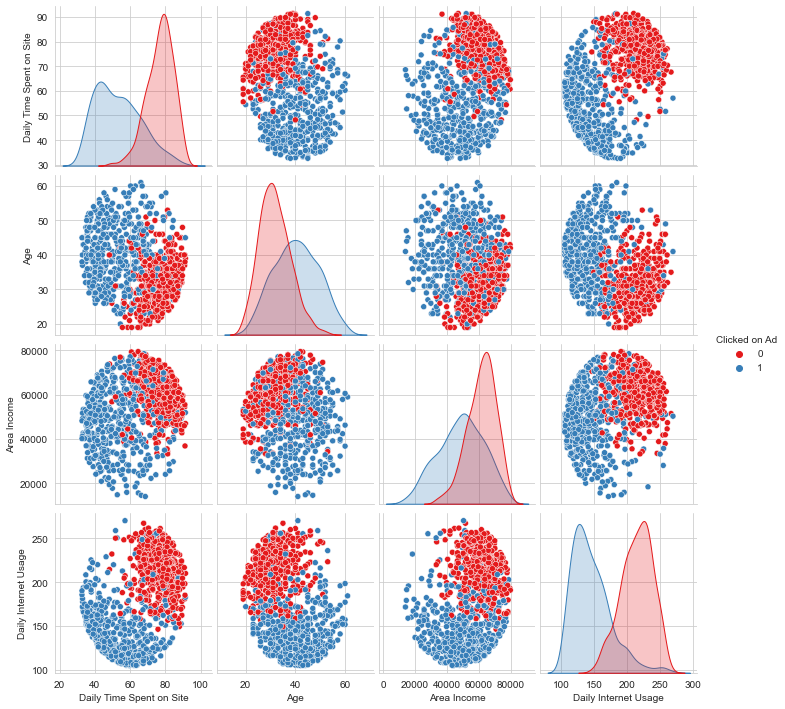

In [11]:
sns.pairplot(data = df.drop('Male',axis = 1),hue= 'Clicked on Ad',palette = 'Set1')

### Heatmap

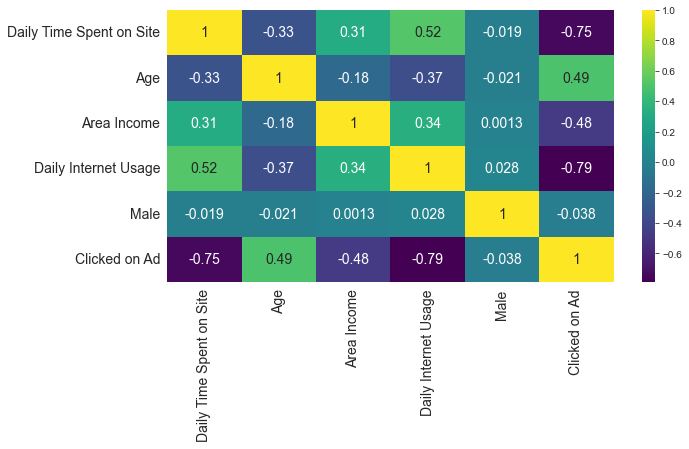

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True,annot_kws={'size':14},cmap = 'viridis')
plt.xticks(size = 14,rotation = 'vertical')
plt.yticks(size = 14)
plt.show()

### Clicked on Ad

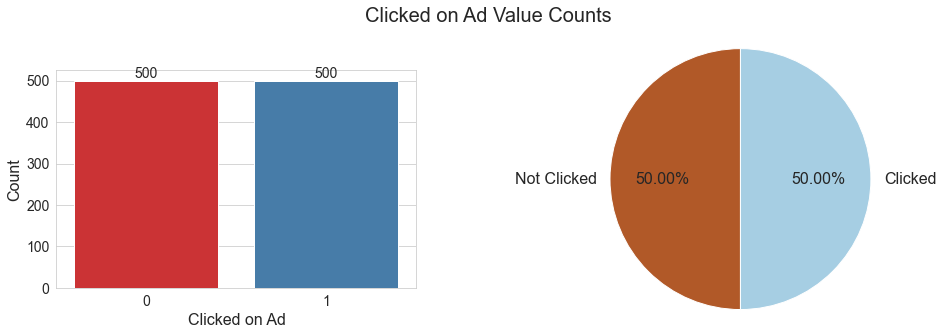

In [13]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Clicked on Ad',data = df,palette = 'Set1')
ax.bar_label(ax.containers[0],size = 14)
plt.xlabel('Clicked on Ad',size = 16)
plt.xticks(size = 14)
plt.ylabel('Count',size = 16)
plt.yticks(size = 14)

plt.subplot(1,2,2)
df['Clicked on Ad'].value_counts().plot.pie(autopct = '%.2f%%',textprops = {'size':16},startangle = 90,
                                           labels = ['Not Clicked','Clicked'],radius = 1.5,cmap = 'Paired_r')

plt.suptitle('Clicked on Ad Value Counts',size = 20,y = 1.1)

plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.4)
plt.show()

### Daily Internet Usage

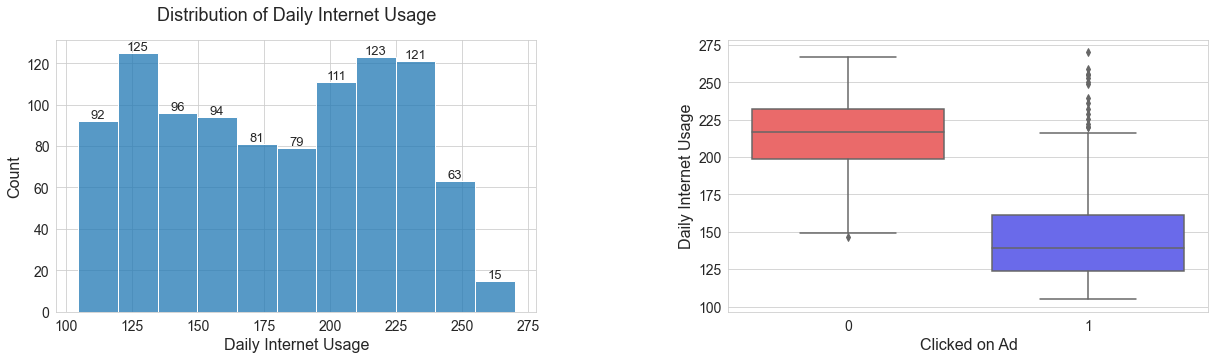

In [14]:
histplot_and_boxplot('Daily Internet Usage')

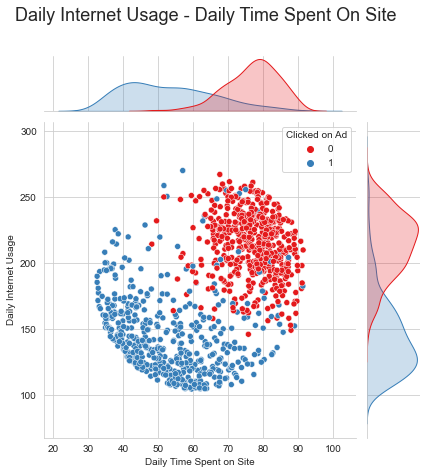

In [15]:
jointplot(x_feature = 'Daily Time Spent on Site',y_feature = 'Daily Internet Usage')
plt.show()

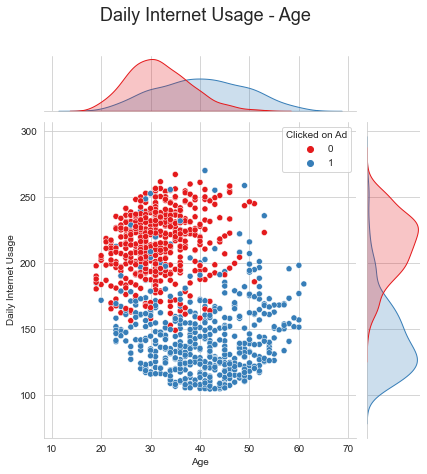

In [16]:
jointplot(x_feature = 'Age',y_feature = 'Daily Internet Usage')
plt.show()

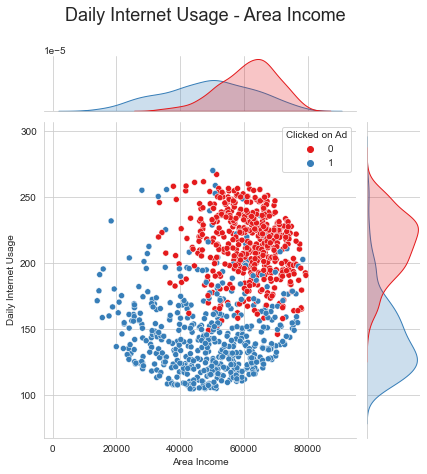

In [17]:
jointplot(x_feature = 'Area Income',y_feature = 'Daily Internet Usage')
plt.show()

### Daily Spent on Site

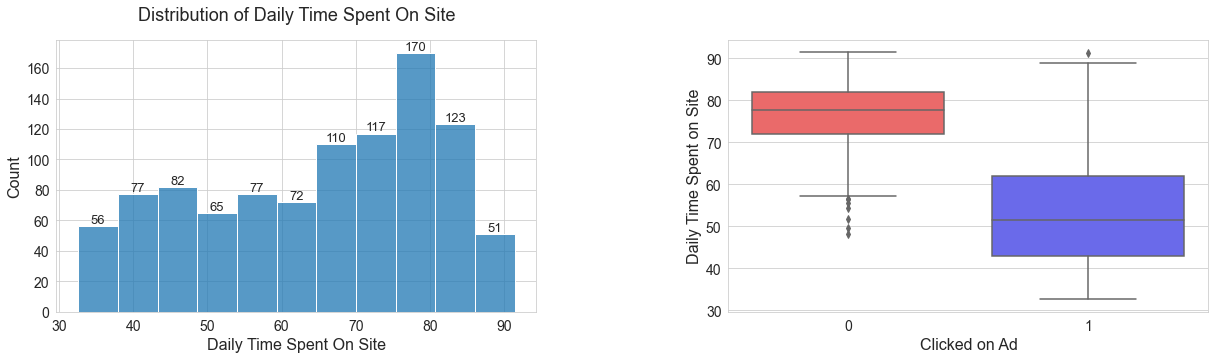

In [18]:
histplot_and_boxplot('Daily Time Spent on Site')

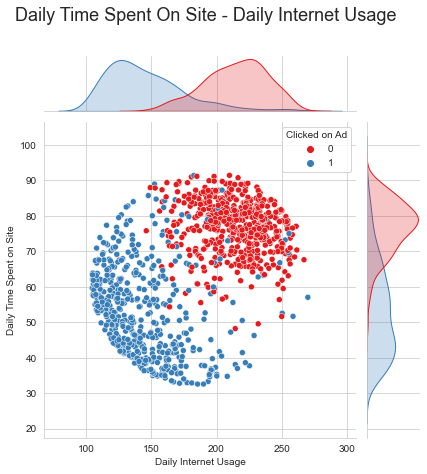

In [19]:
jointplot(x_feature='Daily Internet Usage',y_feature='Daily Time Spent on Site')
plt.show()

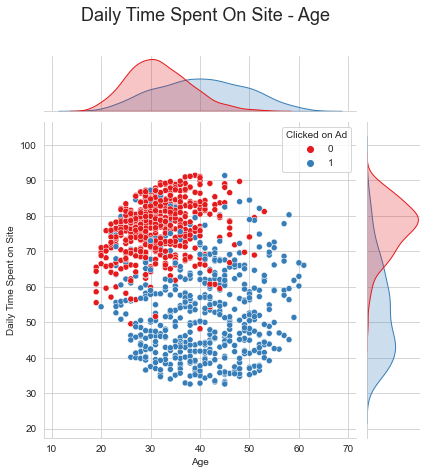

In [20]:
jointplot(x_feature='Age',y_feature='Daily Time Spent on Site')
plt.show()

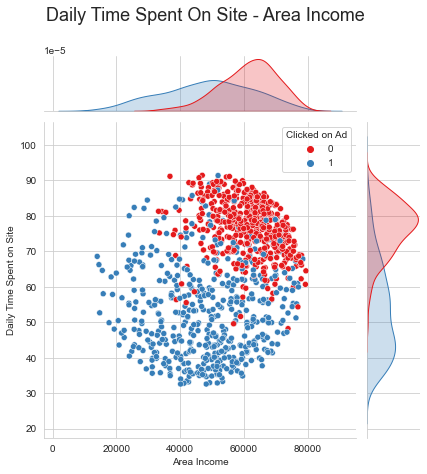

In [21]:
jointplot(x_feature='Area Income',y_feature = 'Daily Time Spent on Site')

### Age

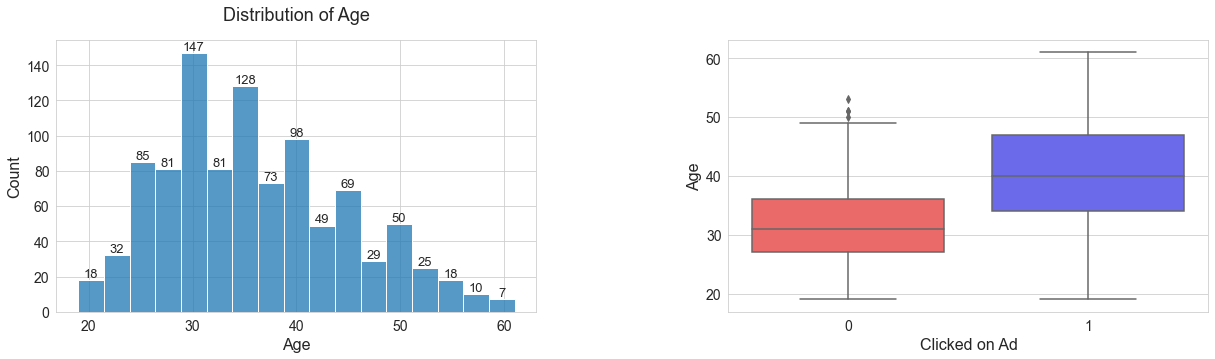

In [22]:
histplot_and_boxplot('Age')

In [23]:
df_age = df.groupby('Age')['Clicked on Ad'].sum().reset_index()
df_age.head()

,Age,Clicked on Ad
0,19,1
1,20,1
2,21,0
3,22,1
4,23,8


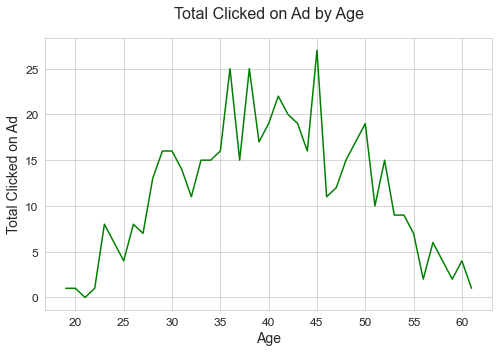

In [24]:
plt.figure(figsize = (8,5))

sns.lineplot(x = 'Age',y = 'Clicked on Ad',data = df_age,color = 'g')

plt.xlabel('Age',size = 14)
plt.xticks(np.arange(20,65,step = 5),size = 12)
plt.ylabel('Total Clicked on Ad',size = 14)
plt.yticks(size = 12)

plt.title('Total Clicked on Ad by Age',size = 16,y = 1.05)
plt.show()

### Area Income

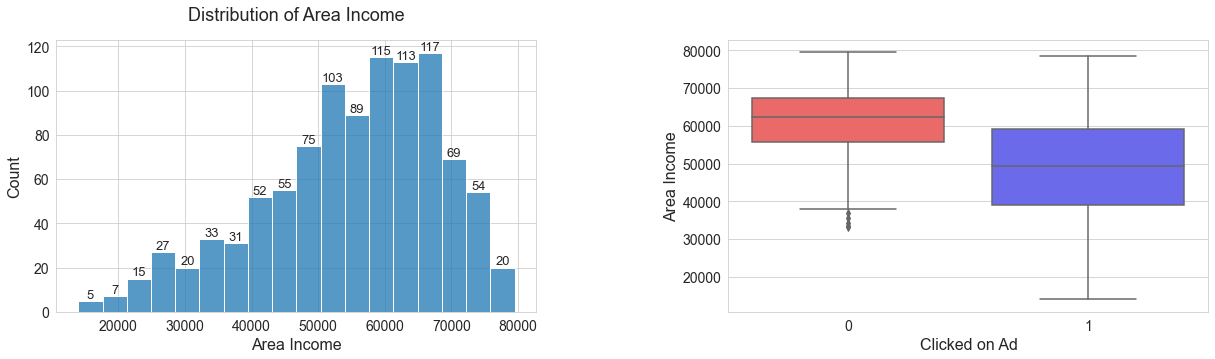

In [25]:
histplot_and_boxplot('Area Income')

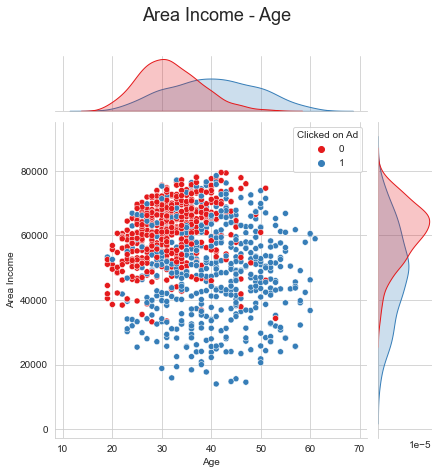

In [26]:
jointplot(x_feature = 'Age',y_feature = 'Area Income')

### Time

#### Months

In [27]:
df['Months'] = df['Timestamp'].apply(lambda x: x.date().month)

In [28]:
df_months = df.groupby('Months')['Clicked on Ad'].sum().reset_index()

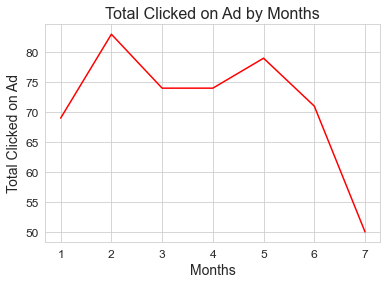

In [29]:
plt.figure(figsize = (6,4))

sns.lineplot(x = 'Months',y = 'Clicked on Ad',data = df_months,color = 'r')

plt.xlabel('Months',size = 14)
plt.xticks(size = 12)
plt.ylabel('Total Clicked on Ad',size = 14)
plt.yticks(size = 12)

plt.title('Total Clicked on Ad by Months',size = 16)
plt.show()

#### Hours

In [30]:
df['Hours'] = df['Timestamp'].apply(lambda x: x.time().hour)

In [31]:
df_hours = df.groupby('Hours')['Clicked on Ad'].sum().reset_index()

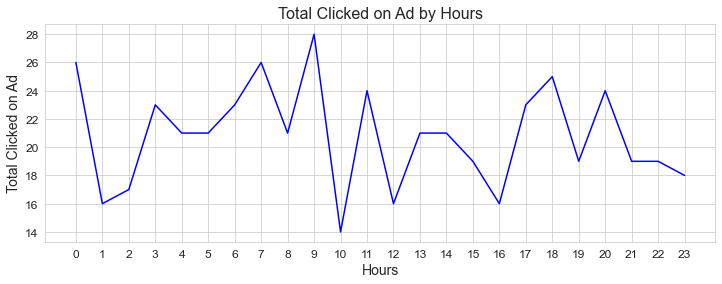

In [32]:
plt.figure(figsize = (12,4))

sns.lineplot(x = 'Hours',y = 'Clicked on Ad',data = df_hours,color = 'b')

plt.xlabel('Hours',size = 14)
plt.xticks(np.arange(0,24,step = 1),size = 12)
plt.ylabel('Total Clicked on Ad',size = 14)
plt.yticks(size = 12)

plt.title('Total Clicked on Ad by Hours',size = 16)
plt.show()

In [33]:
df.drop(['Months','Hours'],axis = 1,inplace = True)

## Data Preprocessing

### Create Independent and Dependent variables

In [34]:
X = df.drop(['Timestamp','Clicked on Ad'],axis = 1).values
y = df['Clicked on Ad'].values

### Split the data into the train set and test set

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

### Scale the Variables

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating Artificial Neural Network Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [39]:
model = Sequential()

model.add(Dense(units=5,activation='relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units=5,activation='relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [40]:
early_stopping = EarlyStopping(mode='min',patience=10,verbose=1)

In [41]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 0.8396 - val_loss: 0.6937
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8227 - val_loss: 0.6575
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7563 - val_loss: 0.6245
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7277 - val_loss: 0.5991
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6878 - val_loss: 0.5762
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6482 - val_loss: 0.5562
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6494 - val_loss: 0.5389
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6353 - val_loss: 0.5221
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6121 - val_loss: 0.5062
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5816 - val_loss: 0.4907
Epoch 11

22/22 [==============================] - 0s 2ms/step - loss: 0.2850 - val_loss: 0.2122
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2916 - val_loss: 0.2121
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2822 - val_loss: 0.2105
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2954 - val_loss: 0.2093
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2653 - val_loss: 0.2084
Epoch 88/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2836 - val_loss: 0.2073
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2735 - val_loss: 0.2064
Epoch 90/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2871 - val_loss: 0.2061
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2856 - val_loss: 0.2058
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2766 - val_loss: 0.2051
Epoch 93/100


<AxesSubplot:>

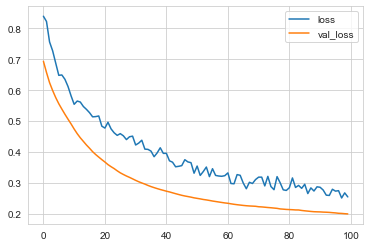

In [42]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Plot Model

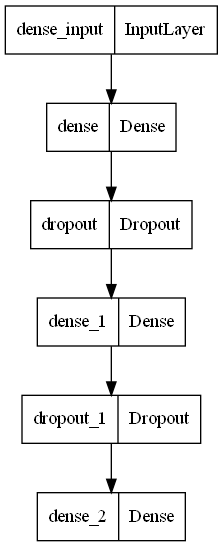

In [60]:
plot_model(model,to_file='model.png')

## Result

In [52]:
y_pred = (model.predict(X_test)> 0.5).astype('int32')

10/10 [==============================] - 0s 2ms/step


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       146
           1       0.97      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [54]:
print(confusion_matrix(y_test,y_pred))

[[142   4]
 [  9 145]]


In [55]:
acc = round(accuracy_score(y_test,y_pred),3)
precision = round(precision_score(y_test,y_pred),3)
recall = round(recall_score(y_test,y_pred),3)

print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}')

Accuracy: 0.957
Precision: 0.973
Recall: 0.942


## Predict a Single Value

In [56]:
# df.describe().transpose()

In [57]:
# predictions = [[your_predictions_of_each_columns]]
# predictions = sc.transform(predictions)

# model_predict = (model.predict(predictions)[0][0] > 0.5).astype('int32')

# print('\nResult: ',model_predict)

## Save / Load ANN Model

### Save

In [58]:
# try:
#     model.save('my_model.h5')  
#     print('Model Saved')
# except Exception as ex:
#     print(ex)

### Load

In [59]:
# from keras.models import load_model
# try:
#     my_model = load_model('my_model.h5')
#     print('Model Loaded')
# except Exception as ex:
#     print(ex)